In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning
from PreprocessDataFrame import PreprocessDataFrame

In [3]:
setup_df         =   SetupDataFrame()
analyze_df       =   AnalyzeDataFrame()
visualize_df     =   VisualizeDataFrame()
eval_model       =   EvalModel()
hp_tuning_model  =   HyperParameterTuning()
preprocess_model =   PreprocessDataFrame()

In [4]:
df = setup_df.setup_ml("29-country_data.csv")

In [5]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(167, 10)
***************************************** TYPES ******************************************
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
****************************************** HEAD ******************************************
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0    

In [6]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
*

In [7]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 167
Variables: 10
cat_cols: 0
num_cols: 9
cat_but_car: 1
num_but_cat: 0

Categorical Cols: []

Numerical Cols: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Categorical but cardinal Cols: ['country']


In [8]:
analyze_df.correlation_for_drop(df[num_cols])

{'gdpp', 'life_expec'}

<Axes: >

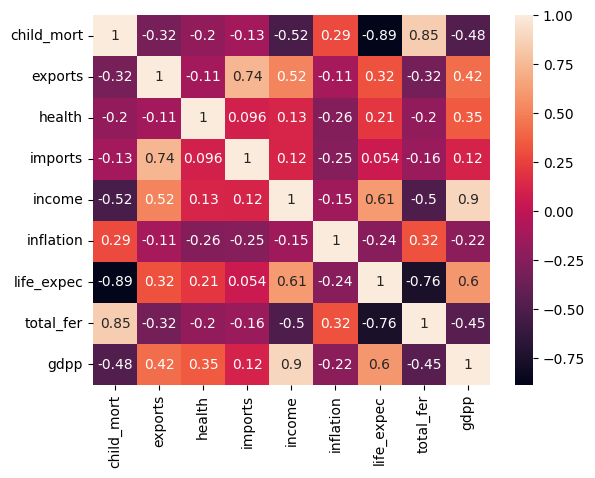

In [9]:
sns.heatmap(df[num_cols].corr(), annot=True)

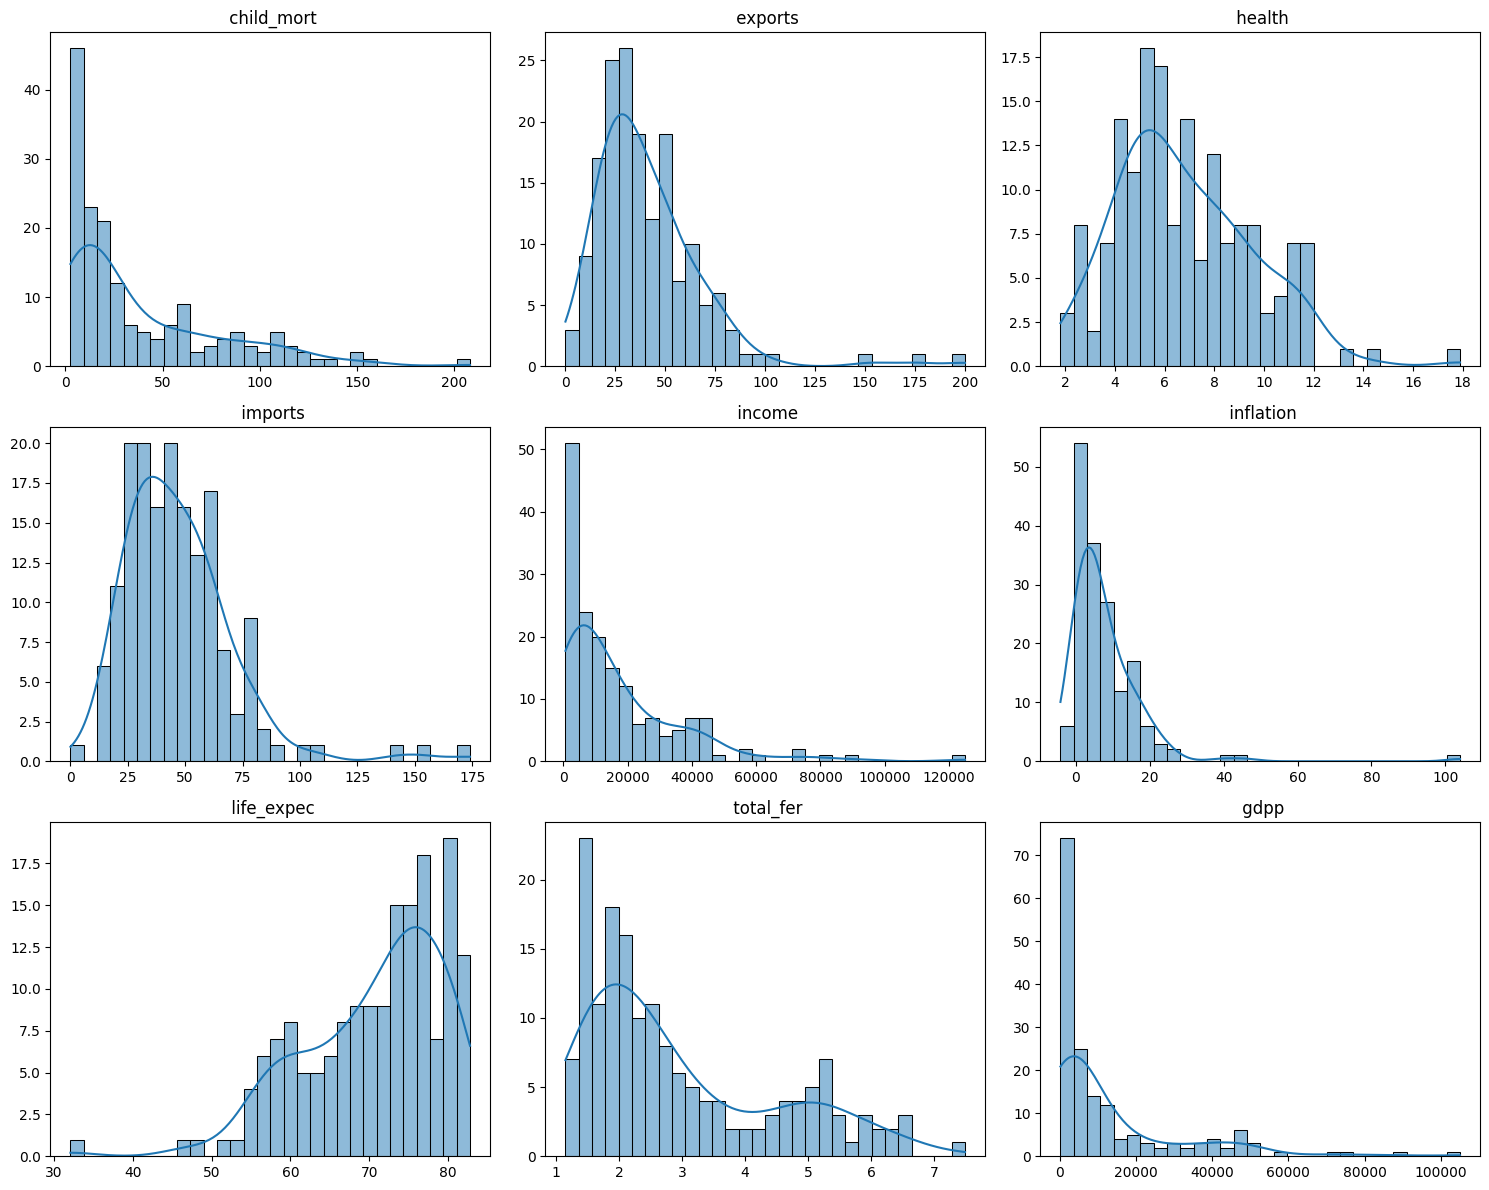

In [15]:
visualize_df.plot_all_histograms(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [12]:
new_df = df.drop("country", axis=1)

In [18]:
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=num_cols)

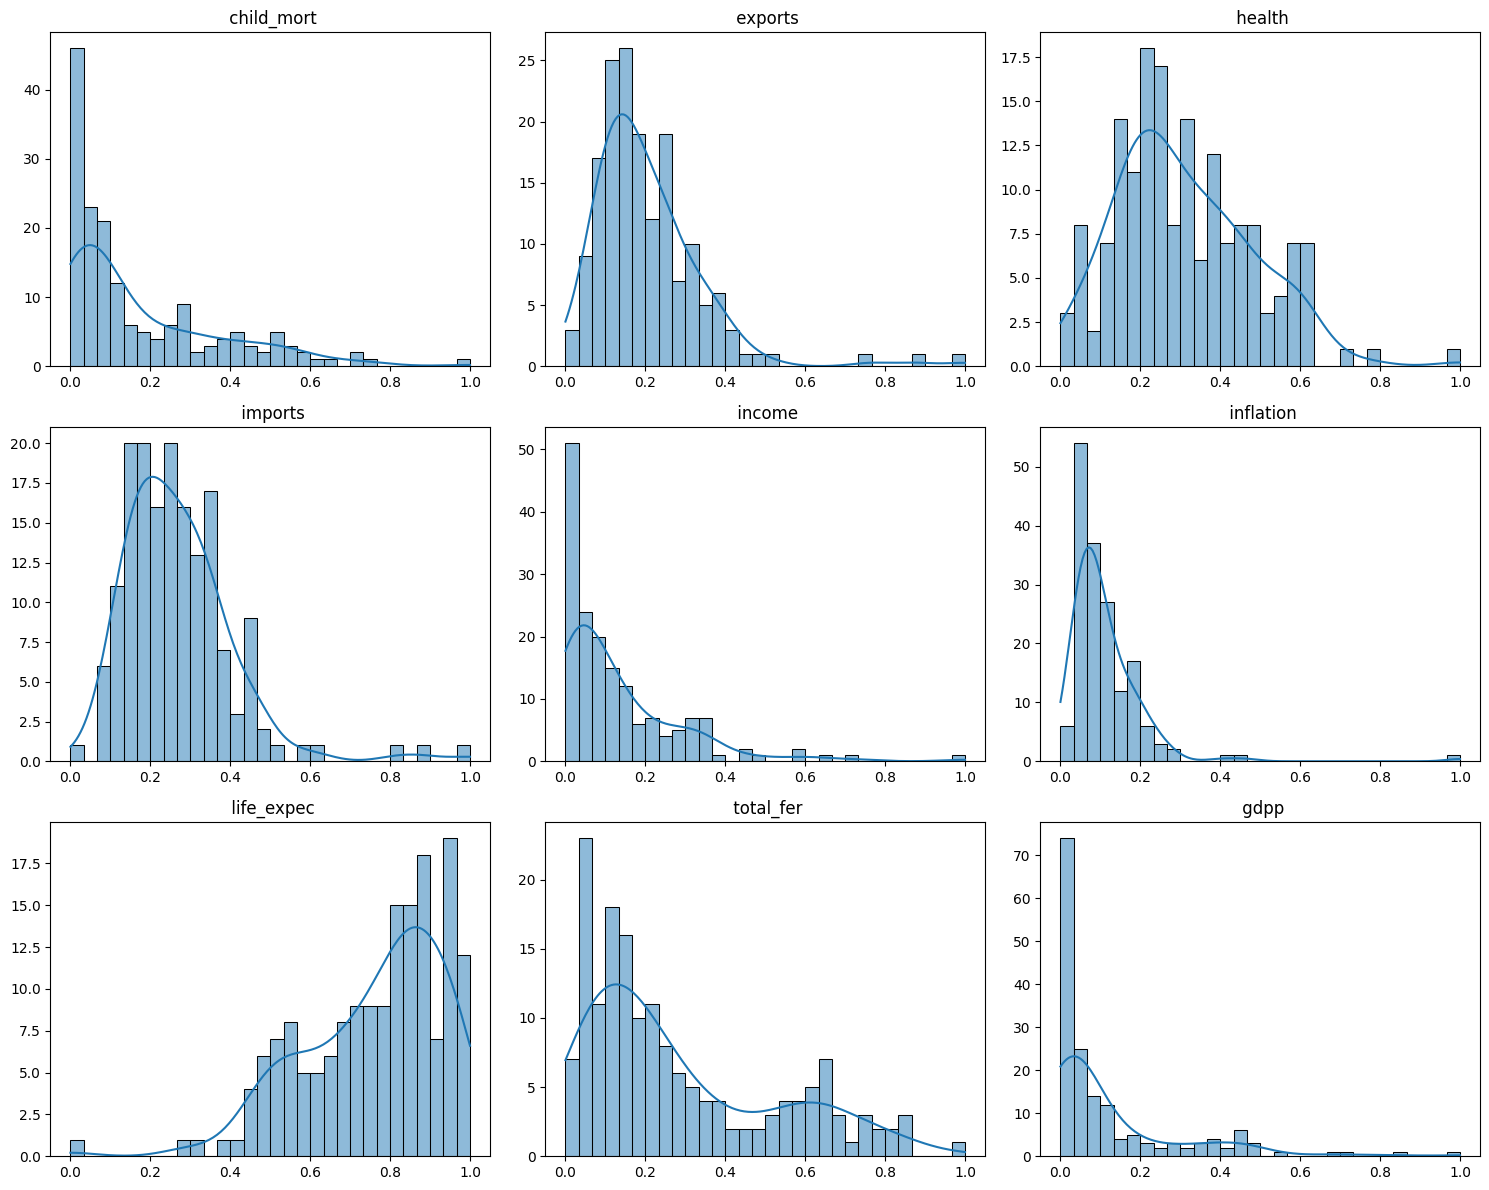

In [19]:
visualize_df.plot_all_histograms(new_df)

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
new_df_pca = pd.DataFrame(pca.fit_transform(new_df))

In [26]:
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

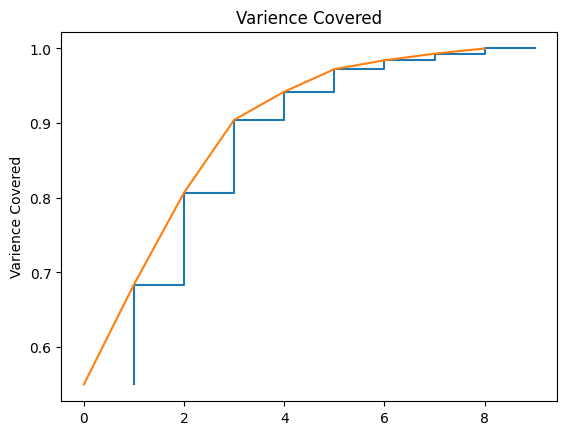

In [27]:
plt.step(list(range(1, 10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Varience Covered")
plt.title("Varience Covered")
plt.show()

In [30]:
new_df_pca = new_df_pca.drop(columns=list(range(3, 9)))

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df_pca)
    wcss.append(kmeans.inertia_)
wcss

[34.53302925308179,
 17.685954209577098,
 11.270622261541504,
 9.90719089019985,
 7.2293274646827195,
 7.624912702851408,
 5.202010407897806,
 4.744830716336827,
 4.499550972871989,
 4.10474225924388]

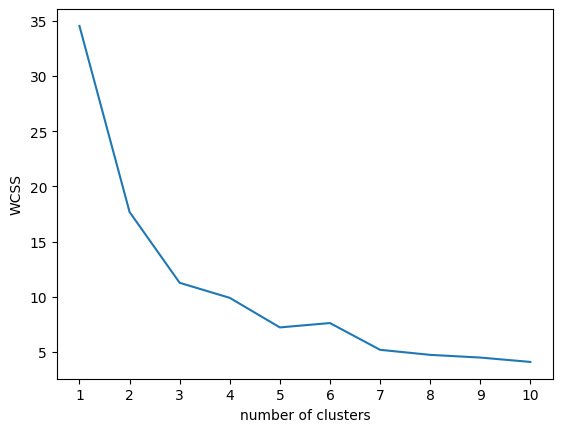

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
model = KMeans(n_clusters=3)
model.fit(new_df_pca)

KMeans(n_clusters=3)

In [34]:
labels = model.labels_

In [35]:
silhouette_score(new_df_pca,labels)

np.float64(0.43863203452366833)

In [36]:
df['Class'] = labels

In [37]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


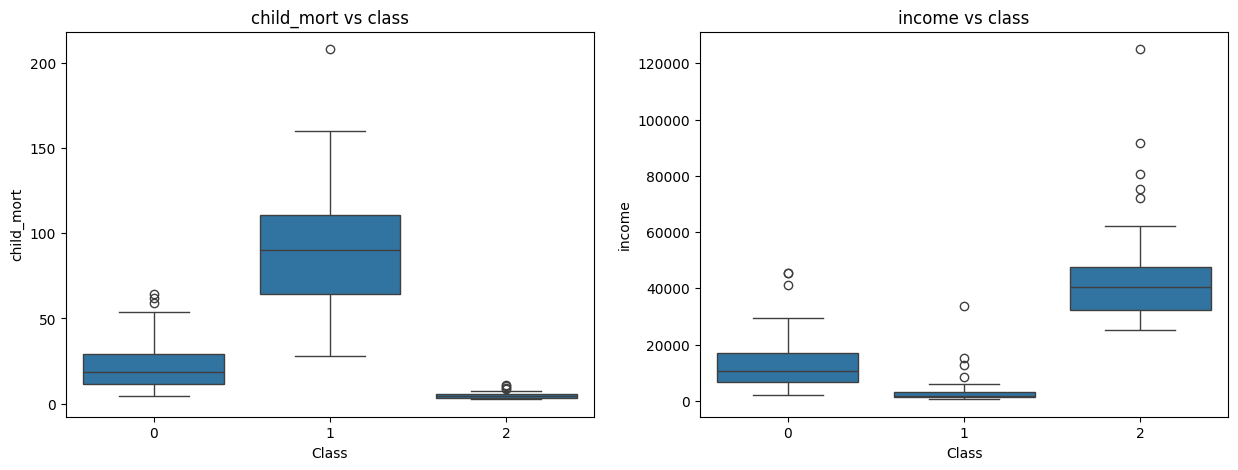

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols= 2 , figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Class", y="child_mort")
plt.title("child_mort vs class")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Class", y="income")
plt.title("income vs class")

plt.show()

In [39]:
# 0 -> no budget needed
# 1 -> budget needed
# 2 -> in between

In [40]:
import plotly.express as px

In [41]:
new_df_pca.insert(0, column= "Country", value = df['country'])

In [42]:
new_df_pca['Class'] = labels

In [43]:
new_df_pca.loc[new_df_pca['Class'] == 1, 'Class'] = "Budget Needed"
new_df_pca.loc[new_df_pca['Class'] == 2, 'Class'] = "In Between"
new_df_pca.loc[new_df_pca['Class'] == 0, 'Class'] = "No Budget Needed"

In [44]:
# alternative, better code to cell above
#label_map = {
#    0: "No Budget Needed",
#    1: "Budget Needed",
#    2: "In Between"
#}

#pca_df2['Class'] = pca_df2['Class'].map(label_map)

In [45]:
new_df_pca

,Country,0,1,2,Class
0,Afghanistan,0.599078,0.095490,0.157554,Budget Needed
1,Albania,-0.158474,-0.212092,-0.064189,No Budget Needed
2,Algeria,-0.003686,-0.135867,-0.134182,No Budget Needed
3,Angola,0.650235,0.275975,-0.142672,Budget Needed
4,Antigua and Barbuda,-0.200711,-0.064662,-0.100715,No Budget Needed
...,...,...,...,...,...
162,Vanuatu,0.160078,-0.029625,-0.121910,No Budget Needed
163,Venezuela,-0.061133,-0.171339,-0.058586,No Budget Needed
164,Vietnam,-0.115512,-0.032034,-0.195243,No Budget Needed
165,Yemen,0.332968,-0.019824,-0.029989,Budget Needed


In [46]:
fig = px.choropleth(
    new_df_pca[['Country', 'Class']],
    locationmode = "country names",
    locations = "Country",
    title = "Needed Budget by Country",
    color = new_df_pca['Class'],
    color_discrete_map= {
                        "Budget Needed" : "Red",
                        "In Between" : "Yellow",
                        "No Budget Needed": "Green"
    })
fig.update_geos(fitbounds = "locations", visible = True)
fig.show()